# CellMap for pancreas endocrine cell data

The tutorial for pancreas endocrine cell data ([Bastidas et al., 2019](https://doi.org/10.1242/dev.173849)).

# Input & preprpcessing

In [1]:
import cellmap
import numpy as np
import scanpy

The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [2]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

## Noise reduction by [RECODE](https://github.com/yusuke-imoto-lab/RECODE).

start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 10602, '#non-significant genes': 7148, '#silent genes': 10248, 'ell': 100, 'Elapsed time': '0h 0m 39s 882ms', 'stat_learning': False, '#test_data': 739}


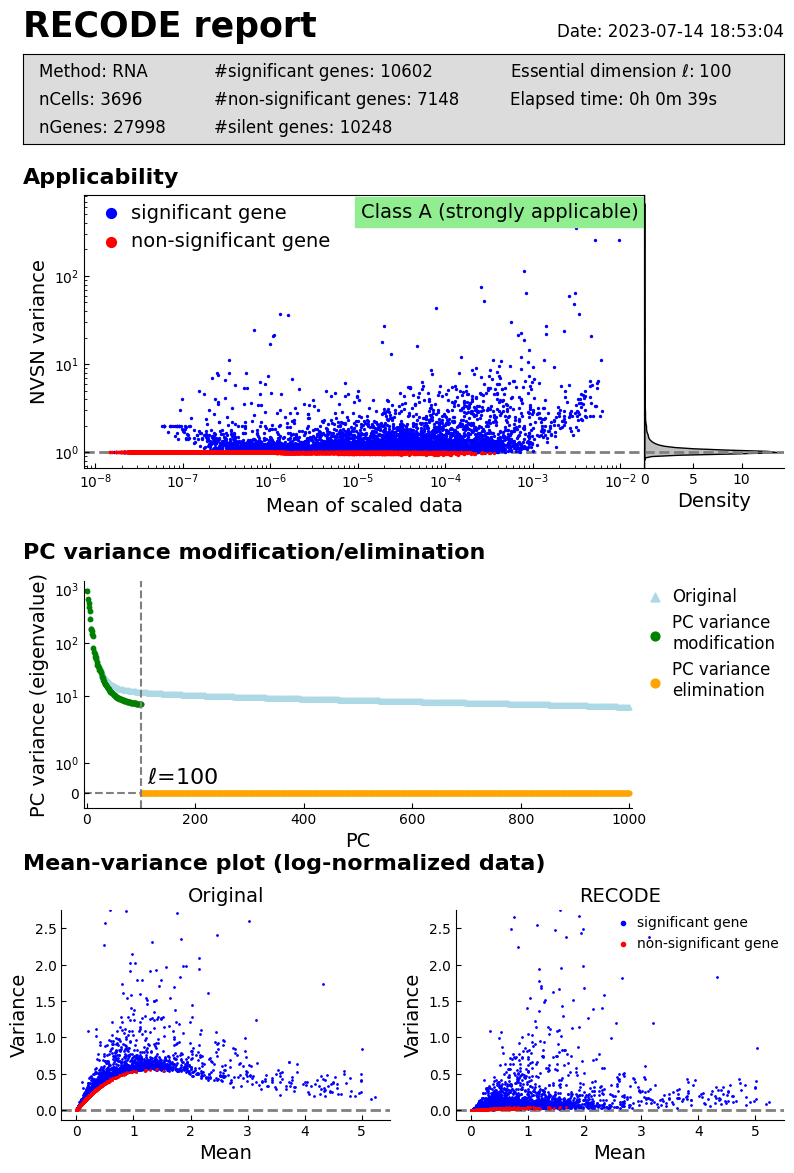

In [3]:
import screcode
recode = screcode.RECODE()
adata.layers['RECODE'] = recode.fit_transform(adata.X.toarray())
adata.layers['RECODE_log'] = np.log(1e4*adata.layers['RECODE'].T/np.sum(adata.layers['RECODE'],axis=1)+1).T
recode.report()

## Log transformtaion

In [4]:
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)

## RNA velocity

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:15) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


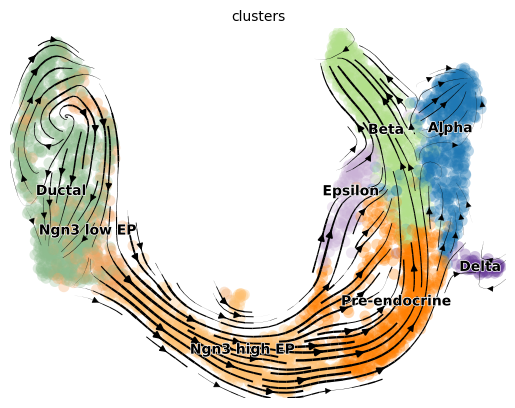

In [5]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata)

# Hodge decomposition

In [6]:
cellmap.Hodge_decomposition(adata)

{'Contribution_ratio': {'Potential': '62.66%', 'Rotation': '37.34%'}}


## View flows

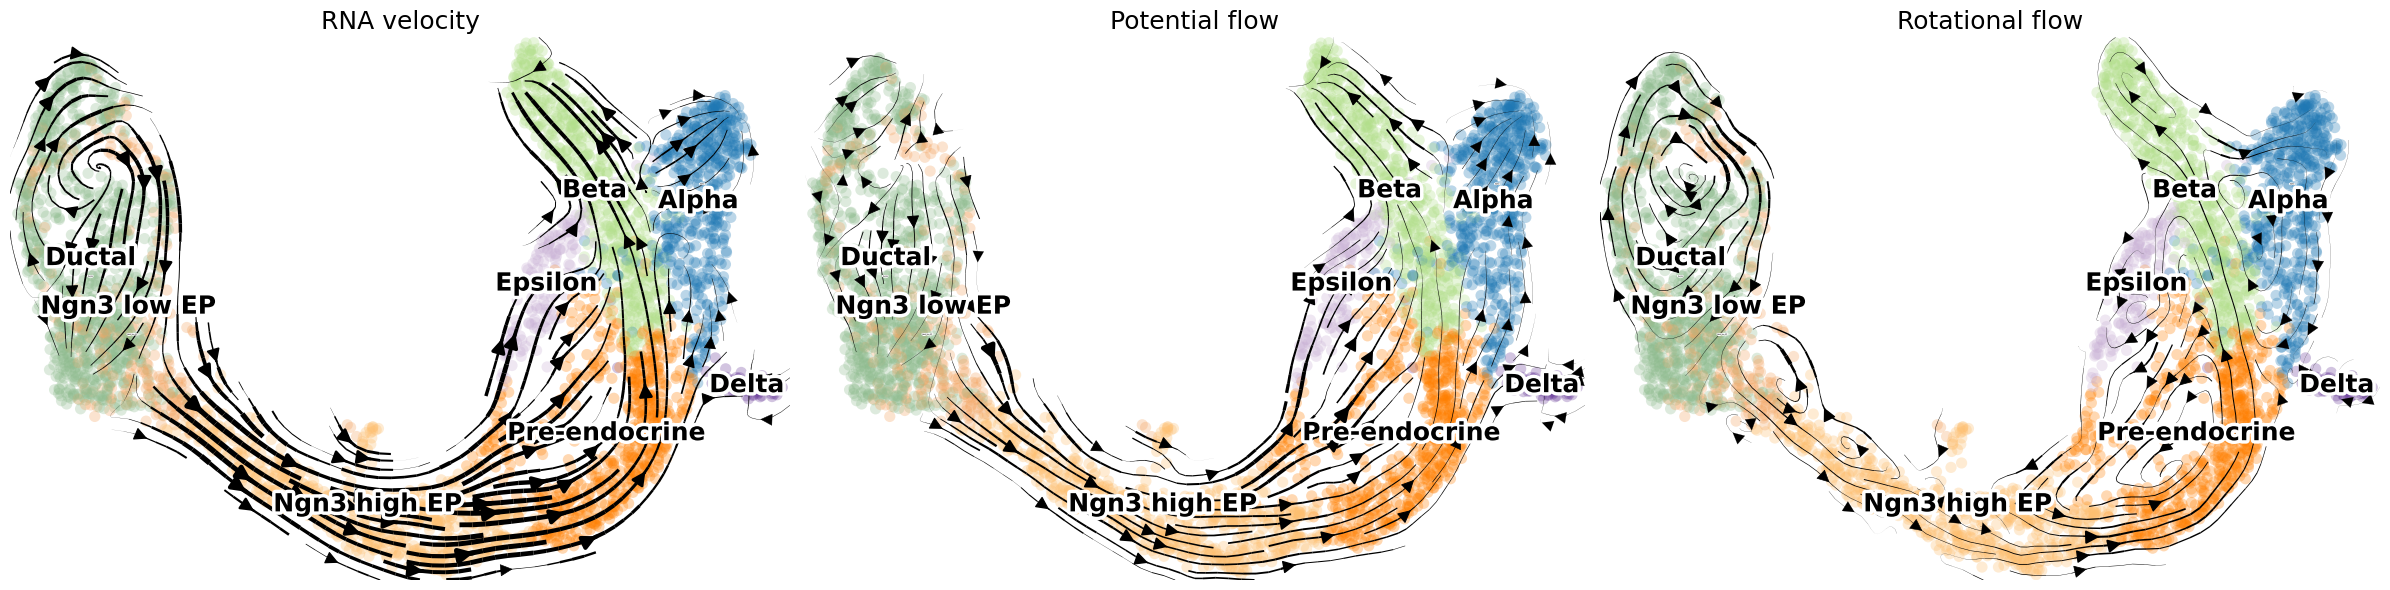

In [7]:
cellmap.view_stream(adata)

## View orbits

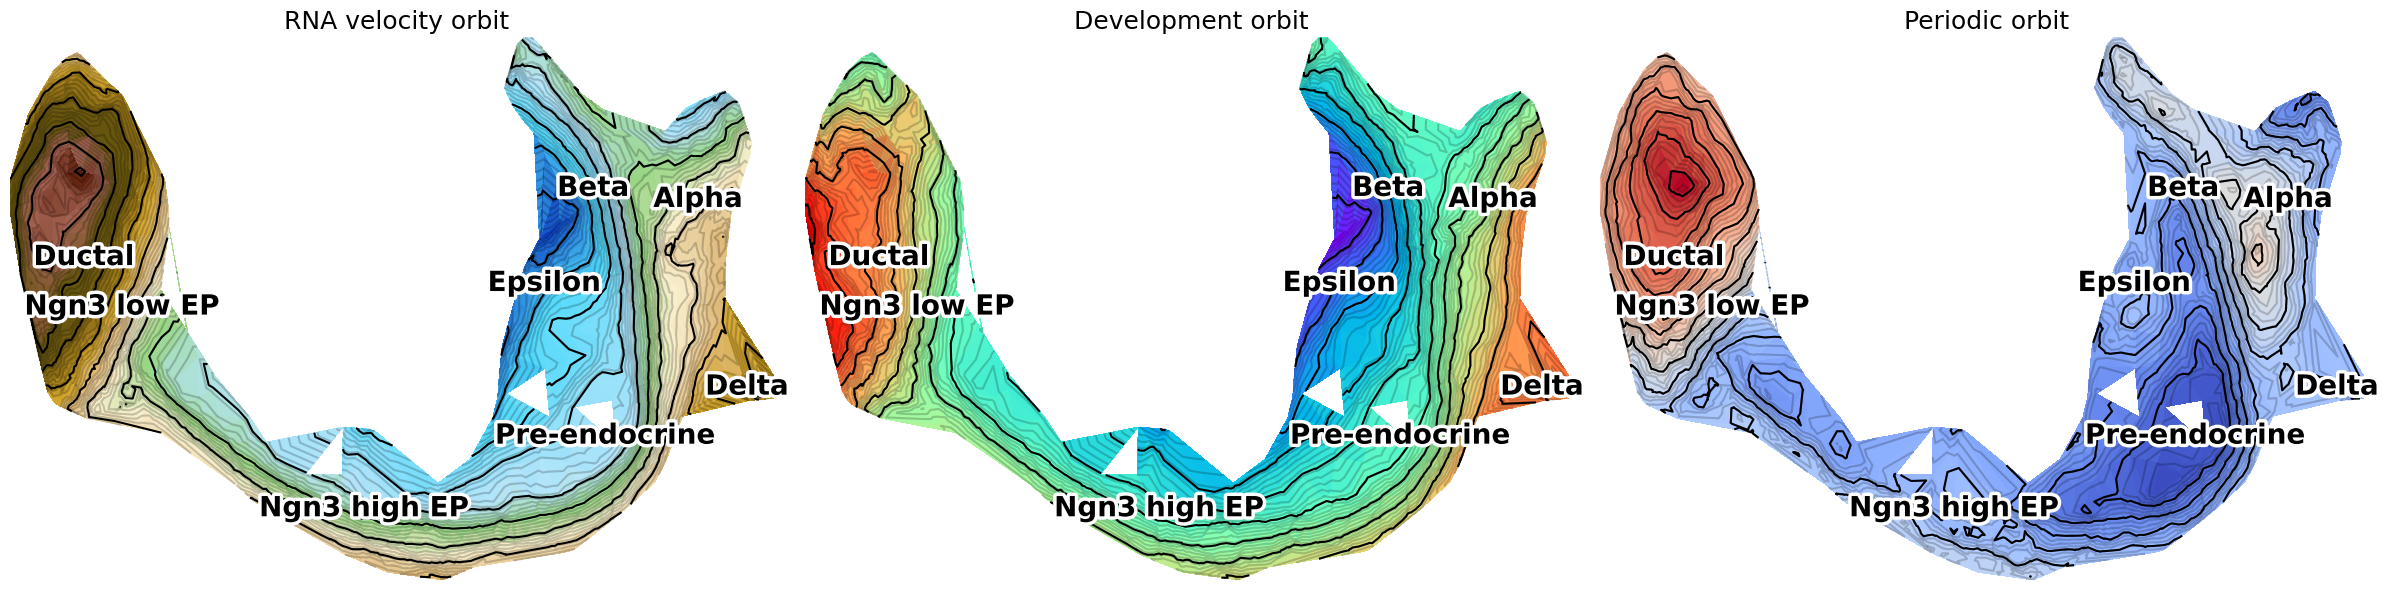

In [8]:
cellmap.view_stream_line(adata)

## View Hodge potential

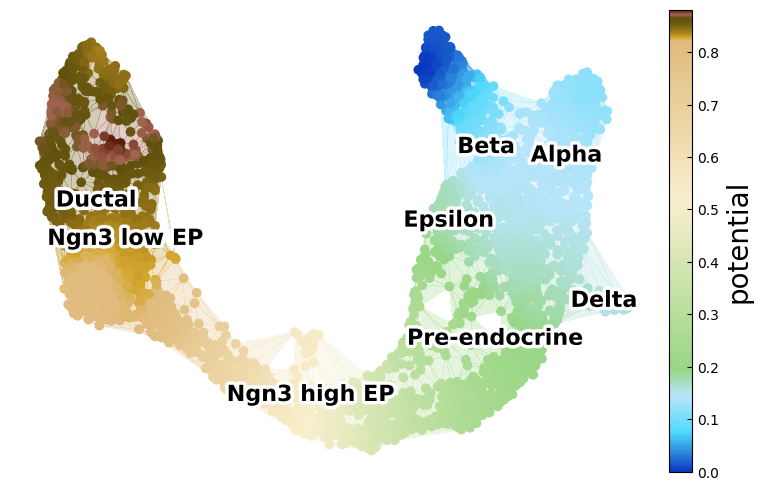

In [9]:
cellmap.view(adata,show_graph = True,cluster_key = 'clusters')

## View Hodge potential 3D

In [10]:
cellmap.view_3D(adata,cluster_key ='clusters',elev=50,azim=65)

## Write for [CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer). 

In [11]:
cellmap.write(adata,filename='CellMap_tutorial_pancreas',exp_key='RECODE_log')

succeeded in writing CellMapp data as "CellMap_tutorial_pancreas.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


X         Y  Potential     Annotation      Rotation  \
CellID                                                                          
AAACCTGAGAGGGATA   6.143066 -0.063644   0.167122  Pre-endocrine  2.704217e-16   
AAACCTGAGCCTTGAT  -9.906417  0.197778   0.825751         Ductal -7.377306e-16   
AAACCTGAGGCAATTA   7.559791  0.583762   0.153953          Alpha  2.458403e-16   
AAACCTGCATCATCCC -11.283765  4.218998   0.867714         Ductal  9.438630e-16   
AAACCTGGTAAGTGGC   1.721565 -4.753407   0.323137   Ngn3 high EP  2.028606e-16   
...                     ...       ...        ...            ...           ...   
TTTGTCAAGTGACATA   4.768472 -1.388353   0.190363  Pre-endocrine -1.575799e-15   
TTTGTCAAGTGTGGCA  -1.873335 -4.182650   0.490542   Ngn3 high EP  2.109677e-16   
TTTGTCAGTTGTTTGG  -9.882250 -0.105594   0.822533         Ductal  1.193655e-17   
TTTGTCATCGAATGCT   6.612424  4.531895   0.129769          Alpha  1.182359e-15   
TTTGTCATCTGTTTGT   3.071043  1.120432   0.170180        Epsilon  5.696526e-16   

                  Streamline_Original  Streamline_Potential  \
CellID                                                        
AAACCTGAGAGGGATA             6.428864              6.428864   
AAACCTGAGCCTTGAT             7.914881              7.914881   
AAACCTGAGGCAATTA             7.908856              7.908856   
AAACCTGCATCATCCC             8.737061              8.737061   
AAACCTGGTAAGTGGC             6.630023              6.630023   
...                               ...                   ...   
TTTGTCAAGTGACATA             4.355716              4.355716   
TTTGTCAAGTGTGGCA             4.854466              4.854466   
TTTGTCAGTTGTTTGG             7.579833              7.579833   
TTTGTCATCGAATGCT             4.531267              4.531267   
TTTGTCATCTGTTTGT             1.928753              1.928753   

                  Streamline_Rotation  Vorticity_Original  \
CellID                                                      
AAACCTGAGAGGGATA             3.136086           -1.289521   
AAACCTGAGCCTTGAT             4.788731            1.378969   
AAACCTGAGGCAATTA             3.122236            1.658176   
AAACCTGCATCATCCC             7.567072           -1.190097   
AAACCTGGTAAGTGGC             2.401261           -4.687190   
...                               ...                 ...   
TTTGTCAAGTGACATA             0.198849            2.543317   
TTTGTCAAGTGTGGCA             2.432562           -0.117607   
TTTGTCAGTTGTTTGG             4.133903           -0.372803   
TTTGTCATCGAATGCT             2.388410            4.068292   
TTTGTCATCTGTTTGT             2.276246           -0.448824   

                  Vorticity_Potential  ...   HVG_Npy  HVG_Krtap17-1  HVG_Gast  \
CellID                                 ...                                      
AAACCTGAGAGGGATA            -1.289521  ...  0.202499       0.815371  0.000000   
AAACCTGAGCCTTGAT             1.378969  ...  0.000000       0.000000  0.487267   
AAACCTGAGGCAATTA             1.658176  ...  0.000000       0.000000  2.267020   
AAACCTGCATCATCCC            -1.190097  ...  0.000000       0.000000  0.000000   
AAACCTGGTAAGTGGC            -4.687190  ...  0.000000       0.000000  0.418346   
...                               ...  ...       ...            ...       ...   
TTTGTCAAGTGACATA             2.543317  ...  0.000000       0.311376  0.116817   
TTTGTCAAGTGTGGCA            -0.117607  ...  0.654403       1.118080  0.000000   
TTTGTCAGTTGTTTGG            -0.372803  ...  0.349530       0.000000  0.200568   
TTTGTCATCGAATGCT             4.068292  ...  0.183360       0.351794  2.113235   
TTTGTCATCTGTTTGT            -0.448824  ...  0.000000       0.000000  0.759649   

                   HVG_Ppy  HVG_8430408G22Rik  HVG_Ppp1r1a  HVG_Peg10  \
CellID                                                                  
AAACCTGAGAGGGATA  0.000000           0.000000     0.071342   0.000000   
AAACCTGAGCCTTGAT  1.122035           1.060028     0.338804   0.588178   
AAACCTGAGGCA

# Dynamical analysis

## Single-cell trajectory

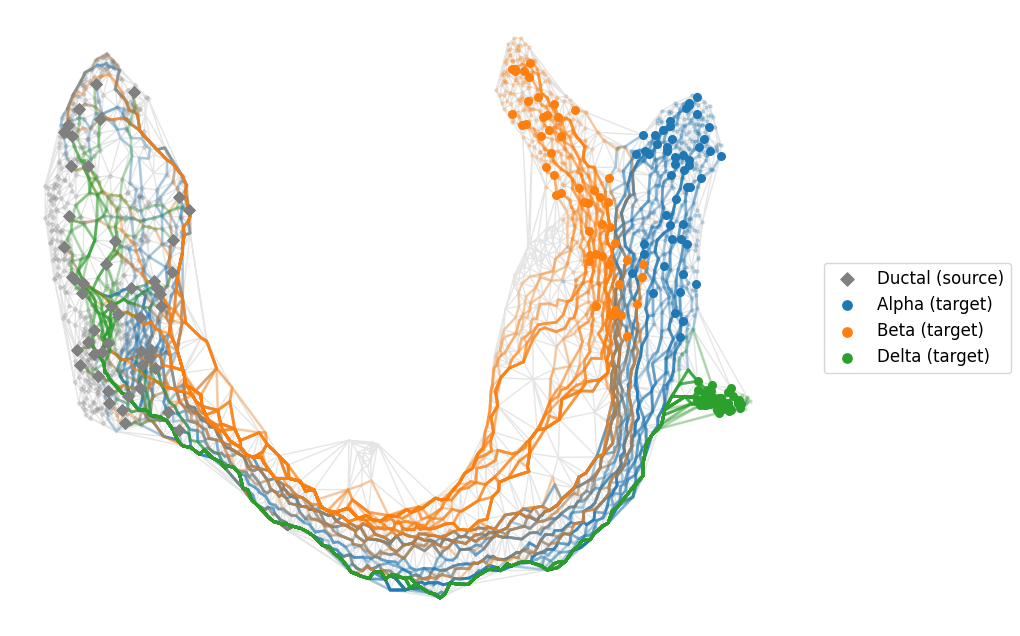

In [12]:
source_cluster = 'Ductal'
target_clusters = ['Alpha','Beta','Delta']
cellmap.view_trajectory(adata,source_cluster,target_clusters)

## Gene expression dynamics

In [13]:
cellmap.calc_gene_dynamics(adata,source_cluster,target_clusters)

Done the computation of gene dynamics


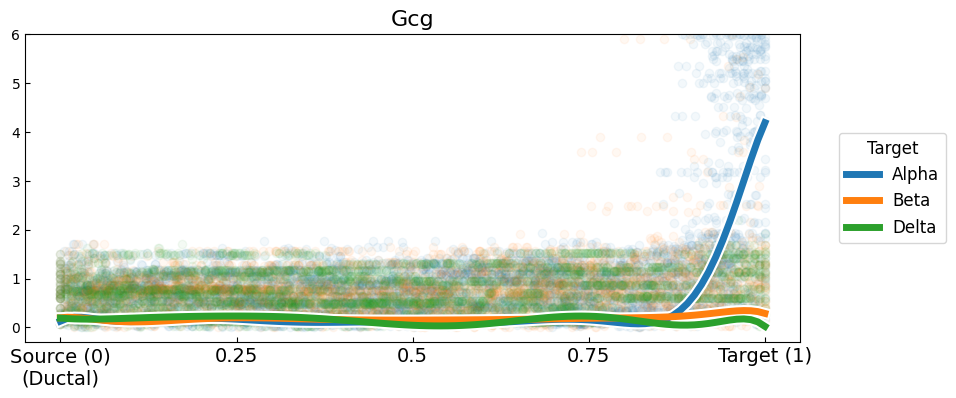

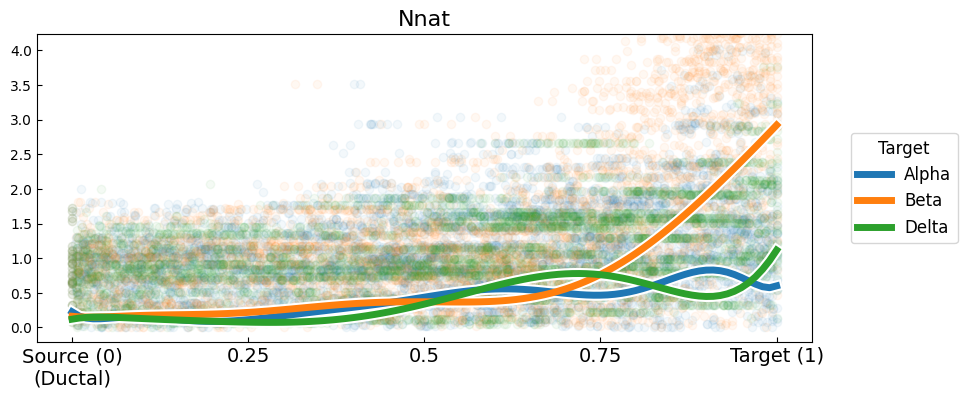

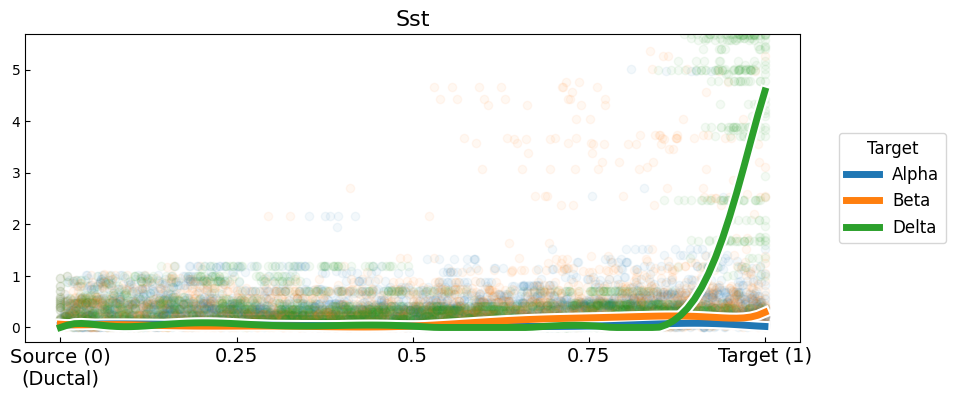

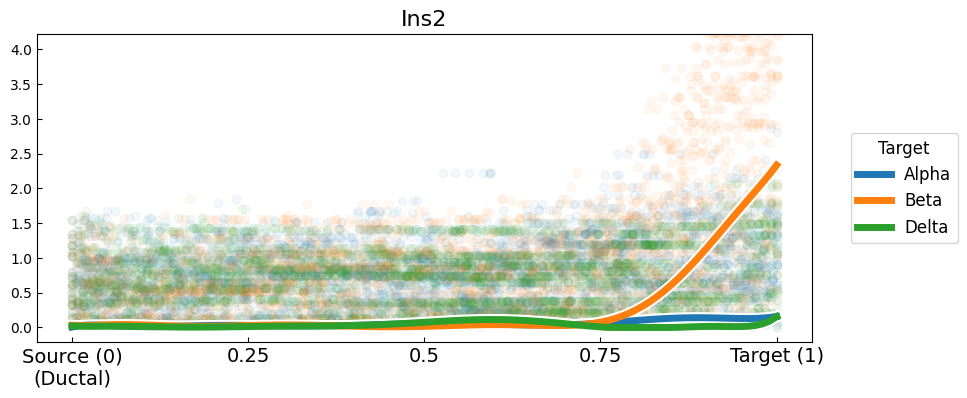

In [14]:
genes = ['Gcg','Nnat','Sst','Ins2'] 
cellmap.gene_dynamics_plot(adata,source_cluster,target_clusters,genes,exp_key='RECODE_log')

## Bifurcation diagram

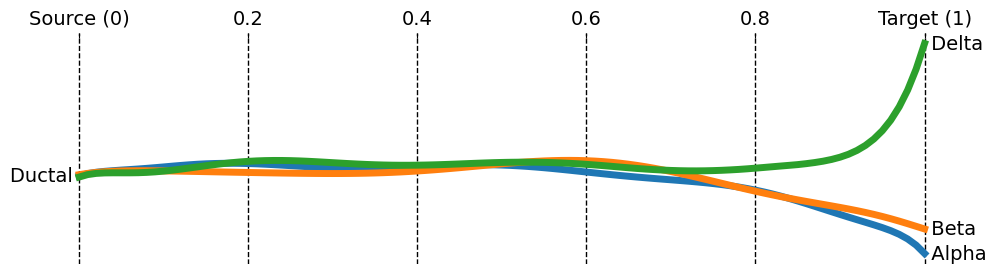

In [15]:
cellmap.bifurcation_diagram(adata,source_cluster,target_clusters)

## DEG dynamics

In [16]:
cellmap.DEG_dynamics(adata,source_cluster,target_clusters,
                     show=False,save=True,
                     save_dir="output",save_filename="DEG_dynamics_pancreas")


Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Beta.gif...
...computing Alpha vs Beta (1/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Delta.gif...
...computing Alpha vs Delta (2/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Beta_Delta.gif...
...computing Beta vs Delta (3/3) 101/101

## Key gene dynamics

Alpha_vs_Beta            Alpha_vs_Delta             Beta_vs_Delta           
           gene Alpha Beta           gene Alpha Delta          gene Beta Delta
1          Pdx1     -    +         Tmem27     +     -          Nnat    +     -
2          Acly     -    +           Scg2     +     -          Pdx1    +     -
3         Pcsk2     -    +            Pyy     +     -          Calr    +     -
4       Zcchc18     +    -            Ppy     +     -          Scg2    +     -

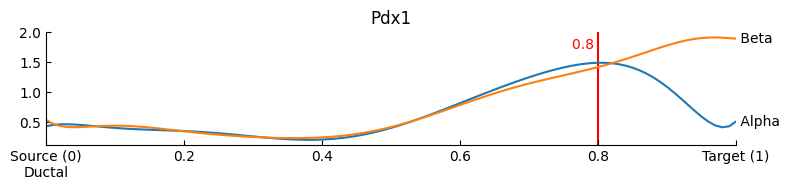

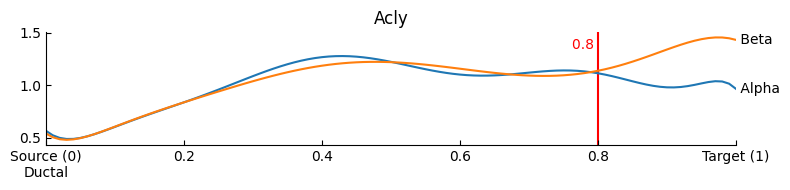

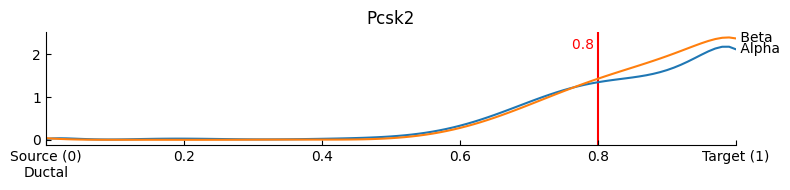

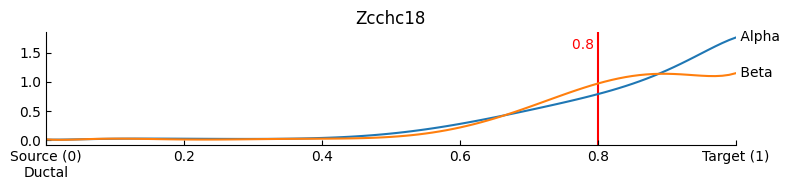

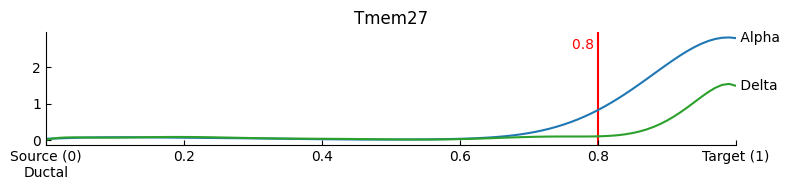

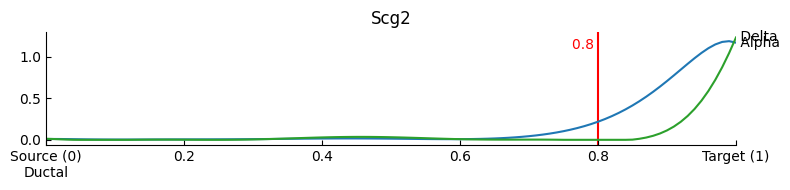

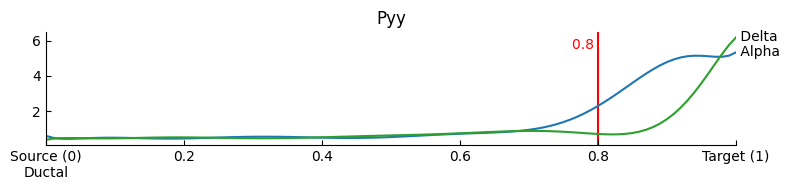

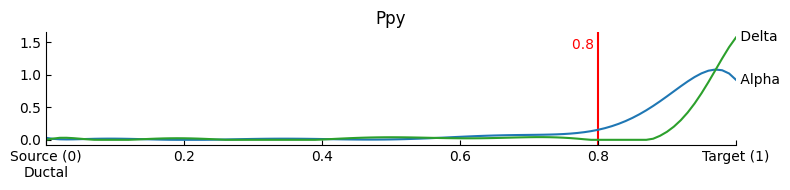

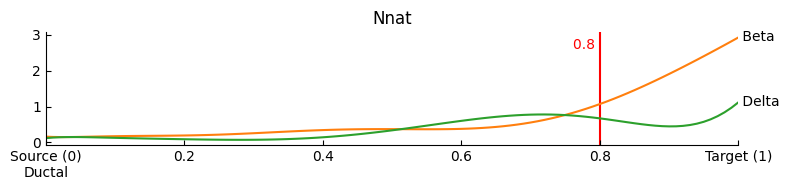

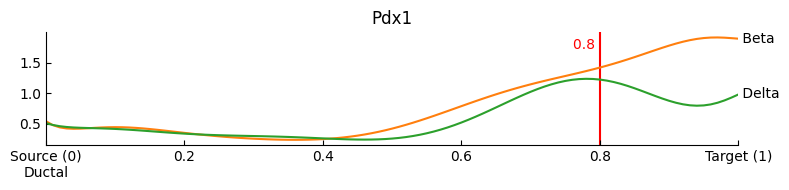

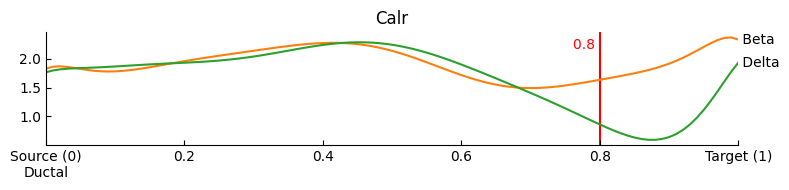

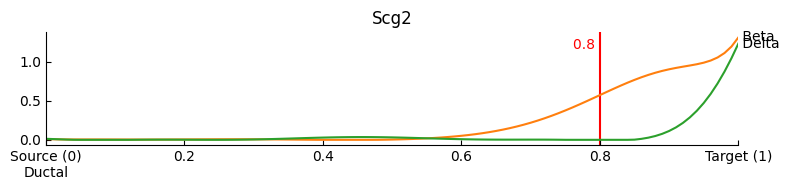

In [17]:
cellmap.key_gene_dynamics(adata,source_cluster,target_clusters,n_genes=4,time=0.8)

## GRN infernece

In [18]:
cellmap.calc_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')

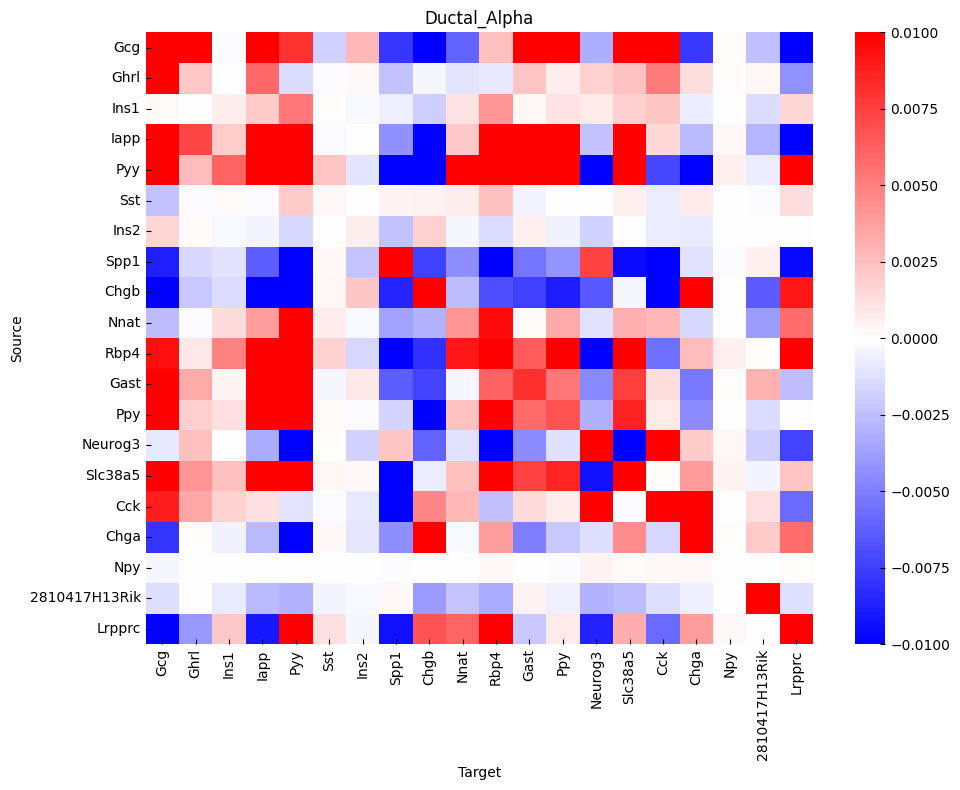

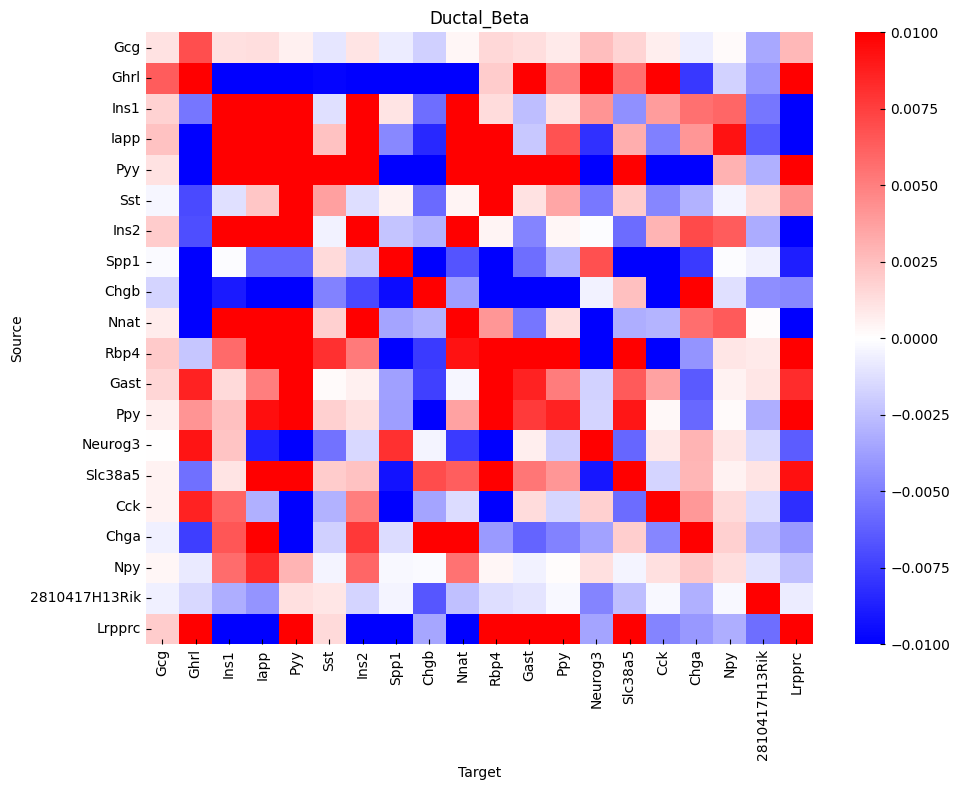

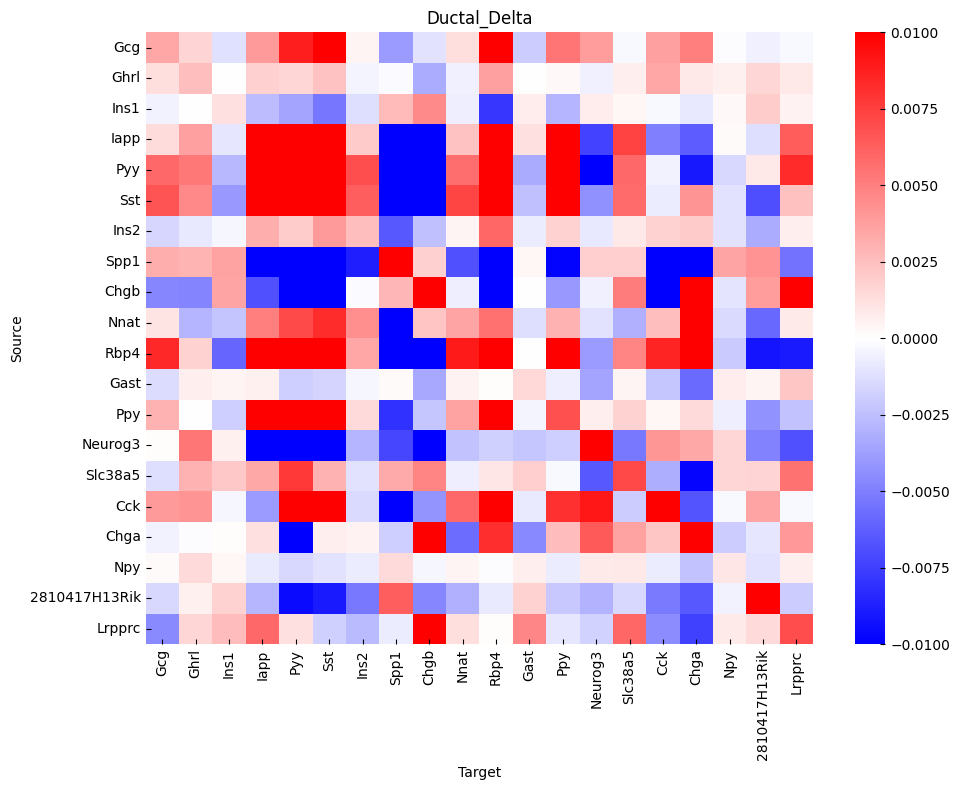

In [19]:
cellmap.view_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')